In [68]:
from typing import Callable

import statistics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
tspa = pd.read_csv("./data/Local_Search_1k-TSPA.csv",sep=';')[["ObjectiveValue","NodeIndices"]]
tspa

,ObjectiveValue,NodeIndices
0,75641.0,154 180 158 53 136 63 182 121 189 26 100 86 75...
1,73718.0,167 124 94 63 122 79 133 151 80 176 137 23 186...
2,73371.0,80 176 137 148 15 114 186 23 89 183 143 0 117 ...
3,72224.0,165 40 185 179 57 55 52 106 178 49 14 144 62 9...
4,77546.0,139 41 5 115 46 0 143 183 89 23 186 15 148 137...
...,...,...
995,72129.0,78 145 179 92 57 55 52 185 40 196 81 90 165 10...
996,74622.0,149 131 112 84 184 177 54 160 34 146 22 159 19...
997,75506.0,63 122 79 80 176 51 151 133 180 154 135 70 127...
998,73570.0,65 116 42 43 149 162 151 133 154 135 70 127 12...


In [70]:
tspb = pd.read_csv("./data/Local_Search_1k-TSPB.csv",sep=';')[["ObjectiveValue","NodeIndices"]]
tspb

,ObjectiveValue,NodeIndices
0,47648.0,15 145 168 195 13 132 169 188 6 147 10 133 191...
1,47954.0,86 185 179 94 47 148 183 140 152 170 34 55 18 ...
2,46676.0,63 135 131 121 112 1 156 198 117 193 54 31 164...
3,47904.0,169 132 13 70 3 145 195 168 139 11 33 144 160 ...
4,47775.0,160 144 111 35 109 0 29 189 155 152 170 34 55 ...
...,...,...
995,48933.0,6 134 139 11 168 195 188 169 132 13 145 15 161...
996,48397.0,8 104 33 138 182 11 139 43 134 51 98 118 74 25...
997,48927.0,145 195 168 139 182 138 11 33 29 0 109 35 111 ...
998,48703.0,28 20 199 140 183 9 148 60 47 94 179 99 130 95...


In [71]:
def get_edges(idx_str:str, inv:bool = False) -> set[tuple[str,str]]:
    nodes = idx_str.split()
    edges = set()
    for i in range(len(nodes)):
        edges.add((nodes[i], nodes[(i+1) % len(nodes)]))
        if inv:
            edges.add(( nodes[(i+1) % len(nodes)],nodes[i]))
    return edges

def edge_sim(idx_str1:str, idx_str2:str) -> float:
    
    edges1 = get_edges(idx_str1)
    edges2 = get_edges(idx_str2,inv=True)
    
    return len(edges1.intersection(edges2)) / len(idx_str1.split()) / 2  

def node_sim(idx_str1:str, idx_str2:str) -> float:
    nodes1 = set(idx_str1.split())
    nodes2 = set(idx_str2.split())
    
    return len(nodes1.intersection(nodes2)) / len(nodes1)

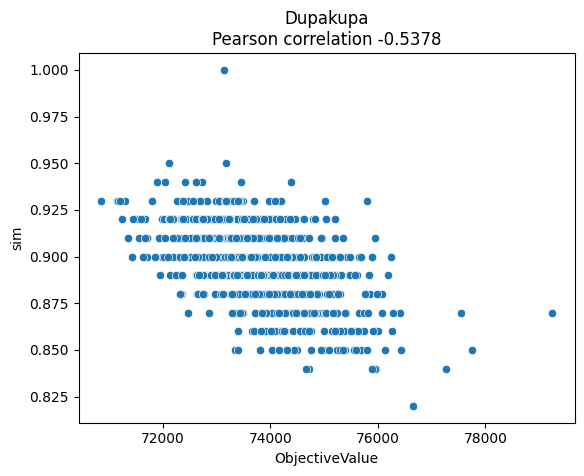

In [ ]:
def make_chart_sim_single(df:pd.DataFrame, sim_solution:str, sim_fn:Callable[[str,str],float], title: str):
    df["sim"] = df["NodeIndices"].apply(lambda v: sim_fn(v,sim_solution))
    corr = df[["ObjectiveValue","sim"]].corr()["sim"]["ObjectiveValue"]
    sns.scatterplot(df,x="ObjectiveValue", y="sim")
    plt.title(f"{title}\nPearson correlation {corr:.4f}")
    plt.show()
    
def make_chart_sim_avg(df:pd.DataFrame, sim_fn:Callable[[str,str],float], title: str):
    df["sim"] = df["NodeIndices"].apply(lambda v: statistics.mean(sim_fn(v,x) for x in df["NodeIndices"].values))
    corr = df[["ObjectiveValue","sim"]].corr()["sim"]["ObjectiveValue"]
    sns.scatterplot(df,x="ObjectiveValue", y="sim")
    plt.title(f"{title}\nPearson correlation {corr:.4f}")
    plt.show()
    
make_chart_sim_single(tspa[1:].copy(), tspa.iloc[6]["NodeIndices"],node_sim,"Dupakupa")
#make_chart_sim_avg(tspb,edge_sim)